##### 필요 라이브러리

 - java 1.7 이상필요(SQL 수업시 이미 설치완료됨 ) 
 - pip install tensorflow 텐서플로우 
 - pip install gensim 젠심 
 - pip install scikit-learn 
 - pip install jupyter notebook
 - pip install nltk 
    -> python 접속 후 
     - import nltk  
     - nltk.download() 
    : 약 1기가정도 데이터 다운로드 화면 나옴 

 - pip install kss (한국어 문장토큰화)


- pip install konlpy
  - 형태소 분석기
     - from konlpy.tag import Okt
     - from konlpy.tag import Kkma

     - okt = Okt() 
     - kkma = Kkma()

    ** mecab 형태소 분석기가 성능 및 처리속도에서 최고이나 설치하기 난해함 

In [217]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter 
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split


In [218]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [219]:
# 뉴스분석 가져오기
total_data = pd.read_csv('c:/users/crid2/nl_test/22_news_title.csv')

In [220]:
# 생긴 인덱스 삭제 
total_data = total_data.drop('Unnamed: 0' , axis=1)
# 라벨 3만 삭제 
label0_idx = total_data.index[(total_data['label'] == 3 )]
total_data = total_data.drop(label0_idx , axis= 0 )


total_data

,title,label
1,데브시스터즈 1분기 영업이익 94억원…작년 동기 대비 60.2% 하락,0
2,"""호텔·상가 리츠, 리오프닝 기대""...대비는 DSR무관 골드스탁 재원으로",1
6,동진쎄미켐 1분기 영업이익 471억원…작년 동기 대비 64.8% 상승,1
9,"""SK가스, 1분기 실적 기대치 상회""...투자는 DSR무관 야호스탁 자금으로",1
10,"""한국전력 제외한 코스피 기업 올해 영업이익 15% 증가""",1
...,...,...
11043,[클릭! 해외증시 이 종목] 코로나 재확산에 '미국판 배민' 도어대시 반등,1
11045,다우존스30 끌어내린 '보잉' vs 치솟는 버진갤럭틱,0
11046,"[코스피] 11.34p(0.35%) 내린 3,232.70(장종료)",0
11047,"[코스닥] 6.19p(0.59%) 내린 1,043.64(장종료)",0


In [221]:
print(len(total_data))
total_data[:5]

5023


,title,label
1,데브시스터즈 1분기 영업이익 94억원…작년 동기 대비 60.2% 하락,0
2,"""호텔·상가 리츠, 리오프닝 기대""...대비는 DSR무관 골드스탁 재원으로",1
6,동진쎄미켐 1분기 영업이익 471억원…작년 동기 대비 64.8% 상승,1
9,"""SK가스, 1분기 실적 기대치 상회""...투자는 DSR무관 야호스탁 자금으로",1
10,"""한국전력 제외한 코스피 기업 올해 영업이익 15% 증가""",1


In [222]:
total_data.drop_duplicates(subset=['title'], inplace = True )
print('총 샘플의 수  : ' , len(total_data))

 # reviews 열에서 중복인 내용이 있다면 중복 제거

총 샘플의 수  :  4976


In [223]:
print(total_data.isnull().values.any())

False


In [224]:
train_data, test_data = train_test_split(total_data, test_size= 0.25 , random_state = 42 )
print( '훈련용 리뷰의 개수 : ' , len(train_data))
print('테스트용 리뷰의 개수 : ' , len(test_data))

훈련용 리뷰의 개수 :  3732
테스트용 리뷰의 개수 :  1244


<AxesSubplot:>

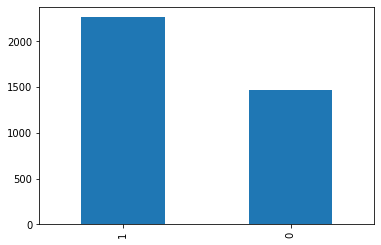

In [225]:
# 부정리뷰 감정리뷰 데이터셋이 고르게 분포함을 확인 
train_data['label'].value_counts().plot(kind = 'bar')


In [226]:
# 데이터 정제 정규식 한글제외한 나머지 모두 제거 

In [227]:
train_data['title'] = train_data['title'].str.replace("[^ㄱ-하-ㅣ가-힣]", "")

C:\Users\crid2\AppData\Local\Temp\ipykernel_10024\1314129026.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['title'] = train_data['title'].str.replace("[^ㄱ-하-ㅣ가-힣]", "")


In [228]:
print('전처리 후 트레인용 샘플의 개수 :',len(train_data))

전처리 후 트레인용 샘플의 개수 : 3732


In [229]:
train_data['title'].replace('', np.nan , inplace=True)
print(train_data.isnull().sum())

title    0
label    0
dtype: int64


In [230]:
test_data.drop_duplicates(subset = ['title'], inplace=True) # 중복 제거
test_data['title'] = test_data['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['title'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))




전처리 후 테스트용 샘플의 개수 : 1244


C:\Users\crid2\AppData\Local\Temp\ipykernel_10024\736158387.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['title'] = test_data['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [231]:
### 토큰화

In [232]:
# 형태소 처리 라이브러리 정의 
okt =  Okt()


In [233]:
print(okt.morphs('와 이런것도 상품이라고 하냐 차라리 내가 붕어빵을 만든는것이 훨씬 낫겠네!!!'))

['와', '이런', '것', '도', '상품', '이라고', '하냐', '차라리', '내', '가', '붕어빵', '을', '만든는것이', '훨씬', '낫겠네', '!!!']


In [234]:
# 불용어 : 추가시 리스트에 추가
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [235]:
train_data['tokenized'] = train_data['title'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [236]:
test_data['tokenized'] = test_data['title'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [237]:
# 단어 길이 및 분포 확인하기 

In [265]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)


In [266]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('하락', 670), ('코스피', 364), ('장', 253), ('영업', 249), ('분기', 204), ('뉴욕증시', 172), ('이익', 171), ('작년', 170), ('대비', 159), ('내', 150), ('린', 147), ('종료', 147), ('코스닥', 134), ('내린', 134), ('개장', 133), ('종합', 133), ('대', 130), ('우려', 121), ('출발', 101), ('억원', 96)]


In [267]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('상승', 961), ('영업', 589), ('분기', 494), ('이익', 490), ('작년', 443), ('대비', 400), ('오른', 339), ('코스피', 333), ('최대', 291), ('천억원', 250), ('종합', 244), ('으로', 234), ('장', 221), ('대', 214), ('실적', 191), ('동기', 184), ('코스닥', 180), ('연', 174), ('억원', 173), ('매수', 168)]


In [268]:
# 시각화 

긍정 리뷰의 평균 길이 : 9.064958020327
부정 리뷰의 평균 길이 : 8.370319945541185


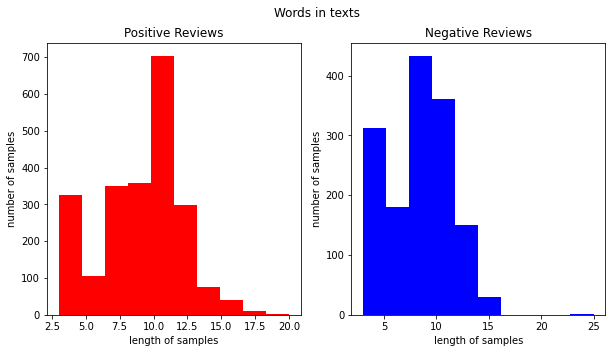

In [269]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))

plt.show()

In [270]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test = test_data['tokenized'].values
y_test = test_data['label'].values



In [271]:
X_train = pd.DataFrame(X_train)
X_train.columns = ['tokenized']
X_train

,tokenized
0,"[코스피, 내, 린, 장, 종료]"
1,"[국내, 투자자, 美中, 수, 하락, 저, 점, 매, 수로, 대응]"
2,"[셀트리온, 작년, 영업, 이익, 천억원, 재작년, 보다, 상승]"
3,"[클릭, 해외, 증시, 종목, 위드, 코로나, 에어비앤비, 사상, 최대, 매출]"
4,"[국제, 유가, 상승, 하락, 다대, 비는, 연, 자금, 으로]"
...,...
3727,"[분기, 영업, 이익, 천억원, 작년, 동기, 대비, 상승]"
3728,"[수협, 은행, 분기, 순, 익, 억, 원, 전, 년, 대비, 상승]"
3729,"[내년, 공, 모, 주, 최대, 어, 엔, 솔월, 코스피, 상장, 나선다]"
3730,"[삼, 전, 분기, 매출, 조원, 넘나, 사상, 최대, 예상]"


In [272]:
X_train =  pd.DataFrame(train_data['tokenized'])
with open('X_train.csv', 'w', encoding = 'utf-8-sig') as f:
    X_train.to_csv(f)
pd.DataFrame(X_train)

,tokenized
10032,"[코스피, 내, 린, 장, 종료]"
4386,"[국내, 투자자, 美中, 수, 하락, 저, 점, 매, 수로, 대응]"
3297,"[셀트리온, 작년, 영업, 이익, 천억원, 재작년, 보다, 상승]"
7124,"[클릭, 해외, 증시, 종목, 위드, 코로나, 에어비앤비, 사상, 최대, 매출]"
7655,"[국제, 유가, 상승, 하락, 다대, 비는, 연, 자금, 으로]"
...,...
10026,"[분기, 영업, 이익, 천억원, 작년, 동기, 대비, 상승]"
796,"[수협, 은행, 분기, 순, 익, 억, 원, 전, 년, 대비, 상승]"
7046,"[내년, 공, 모, 주, 최대, 어, 엔, 솔월, 코스피, 상장, 나선다]"
8433,"[삼, 전, 분기, 매출, 조원, 넘나, 사상, 최대, 예상]"


In [ ]:
# 파일로 변환 
# min pd.DataFrame(X_train).to_csv('X_train.csv')
# min pd.DataFrame(y_train).to_csv('y_train.csv')
# min pd.DataFrame(X_test).to_csv('X_test.csv')
# min pd.DataFrame(y_test).to_csv('y_test.csv')

In [ ]:
print(type((X_train['tokenized'][1])))

# 다시 list 변환 
'''
print("###### X_train")
X_train = pd.read_csv('X_train.csv')
print(X_train.shape)
print(type(X_train))

print("###### X_train2")
X_train2 = X_train["tokenized"].squeeze()
print(type(X_train2))
print(X_train2.shape)

print("###### X_train3")
X_train3 = X_train2.values
print(X_train3[0])
print(type(X_train3[0]))
print(X_train3.shape)

print("###### X_train4")
X_train4 = []
print("#### Split 시작")
for str in X_train3:
    str = str.replace("[", "").replace("]", "").replace(" '", "").replace("'", "")
    X_train4.append(str.split(","))
print("#### Split 끝")
print(X_train4[0])
print(type(X_train4[0]))


X_train = X_train4.copy()
'''

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [132]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 4006
등장 빈도가 1번 이하인 희귀 단어의 수: 2252
단어 집합에서 희귀 단어의 비율: 56.21567648527209
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.856029469966816


In [133]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 1756


In [134]:
## 재 토큰화 
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [135]:
print(X_train[:3])

[[5, 38, 42, 10, 19], [209, 261, 1, 66, 6, 57, 48, 78, 958, 959], [245, 8, 3, 7, 14, 960, 95, 2]]


In [136]:
print(X_test[:3])

[[15, 13, 10, 19], [231, 4, 3, 46, 14, 156, 725, 43, 16, 11], [868, 4, 3, 46, 115, 275, 34, 90, 241, 11]]


리뷰의 최대 길이 : 25
리뷰의 평균 길이 : 8.80144694533762


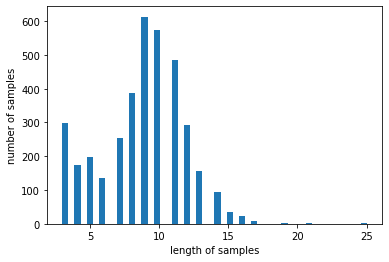

In [137]:
# 패딩 

print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [138]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [139]:
max_len = 25
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 100.0


In [140]:
# 리뷰길이 27으로 패딩 

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [112]:
# 자연어 딥러닝 모델 

In [143]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [144]:
# embedding_dim = 100
# hidden_units = 128

# model = Sequential()
# model.add(Embedding(vocab_size, embedding_dim))
# model.add(GRU(hidden_units))
# model.add(Dense(1, activation='sigmoid')) # 이진분류시 1 , sigmoid 



# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# mc = ModelCheckpoint('test01_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# history = model.fit(X_train, y_train, epochs=20, callbacks=[es, mc], batch_size=64, validation_split=0.2)

In [145]:
loaded_model = load_model('test01_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

39/39 [==============================] - 1s 4ms/step - loss: 0.0380 - acc: 0.9904

 테스트 정확도: 0.9904


In [146]:
## 리뷰예측하기
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)

  score = float(loaded_model.predict(pad_new))
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [147]:
 sentiment_predict('한온시스템, 전기차 핵심 부품사 치고는 협상력 부족…목표가↓')
    # 화살표를 다시 글자로 바꿔서 넣어야 정확히 판단 가능 

55.26% 확률로 긍정 리뷰입니다.


In [148]:
 sentiment_predict('한온시스템, 전기차 핵심 부품사 치고는 협상력 부족…목표가 하락')

55.66% 확률로 긍정 리뷰입니다.


In [150]:
sentiment_predict('유럽증시 전쟁종료 기대에 상승')

54.72% 확률로 긍정 리뷰입니다.


In [153]:
sentiment_predict('코스피 하락')

58.08% 확률로 긍정 리뷰입니다.
